### <span style='color:tomato;'>การแปลงภาพเชิงพื้นที่</span>

**<span style='color:lightblue;'>การแปลงภาพเชิงพื้นที่</span>** เป็นกระบวนการที่เกี่ยวข้องกับการจัดการภาพเพื่อเปลี่ยนการกำหนดค่าเชิงพื้นที่ของภาพ ซึ่งอาจรวมถึงการดำเนินการต่างๆ เช่น การหมุน การปรับขนาด (ปรับเปลี่ยนขนาด) การแปล (การเลื่อน) และการเฉือน การแปลงเหล่านี้สามารถนำไปใช้เพื่อจุดประสงค์ต่างๆ เช่น การแก้ไขการวางแนวของภาพ การจัดตำแหน่งภาพในชุดข้อมูล หรือเตรียมภาพสำหรับการวิเคราะห์หรือการแสดงผลเพิ่มเติม สาระสำคัญของการแปลงเชิงพื้นที่คือการแมปตำแหน่งของพิกเซลในภาพอินพุตไปยังตำแหน่งใหม่ในภาพเอาต์พุต ตามกฎการแปลงที่ระบุไว้

การแปลงเชิงพื้นที่มักจะอธิบายโดยใช้แบบจำลองทางคณิตศาสตร์ แบบจำลองทั่วไปคือการแปลงแอฟฟีน ซึ่งรองรับการแปล การหมุน การปรับขนาด และการเฉือน และสามารถแสดงด้วยเมทริกซ์ได้ การแปลงที่ซับซ้อนมากขึ้น เช่น การแปลงมุมมองหรือการบิดเบือนแบบไม่เชิงเส้น จำเป็นต้องใช้แบบจำลองที่ซับซ้อนมากขึ้น

การแปลงเหล่านี้มีความสำคัญมากในาหลายด้านของการมองเห็นด้วยคอมพิวเตอร์ การประมวลผลภาพ และกราฟิกส์ เนื่องจากการแปลงเหล่านี้อนุญาตให้จัดการเชิงเรขาคณิตของภาพเพื่อให้บรรลุผลลัพธ์ที่ต้องการหรือเพื่อจำลองมุมมองหรือเอฟเฟกต์เฉพาะ ตัวอย่างเช่น ในการมองเห็นด้วยคอมพิวเตอร์ การแปลงเชิงพื้นที่ใช้เพื่อจำลองการเปลี่ยนแปลงจุดมองของกล้อง ในขณะที่ในกราฟิกส์ อาจใช้เพื่อสร้างภาพเคลื่อนไหวหรือปรับภาพให้พอดีกับหน้าจอของขนาดต่างๆ


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
# ฟังก์ชันหาจุดศูนย์กลางของภาพ
def centroid_image(img):
    r, c, n = img.shape  # r=แถว, c=คอลัมน์, n=จำนวนช่องสี
    return (int(r/2), int(c/2))  # คืนค่าพิกัด (แถวกลาง, คอลัมน์กลาง)

In [3]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

### การแปลงทางเรขาคณิต 2D


#### <span style='color:tomato;'>การแปลภาพ 2D</span>

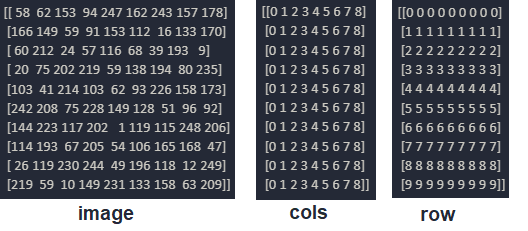


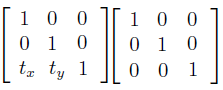      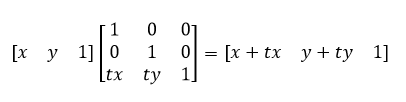   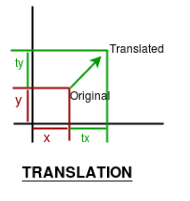

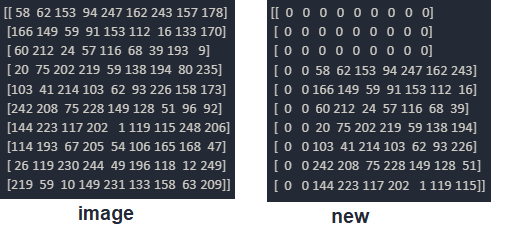

#### <span style='color:tomato;'>ฟังก์ชันการแปลภาพ</span>


In [4]:
# ฟังก์ชันแปลภาพ (Translation)
# tx, ty = ระยะการแปล
def img_translation(img, tx, ty):
    out = np.zeros_like(img, dtype='uint8')  # สร้างภาพเอาต์พุตขนาดเดียวกัน
    Ts = np.identity(3, dtype=float)  # สร้างเมทริกซ์เอกลักษณ์ 3x3
    Ts[2, 0] = tx  # กำหนดค่า tx
    Ts[2, 1] = ty  # กำหนดค่า ty
    rows, cols, n = img.shape
    
    # วนลูปผ่านพิกเซลแต่ละตัวในภาพอินพุต
    for y in range(rows):
        for x in range(cols):
            xy = np.array([x, y, 1], dtype=float)  # พิกัดเดิม (x, y, 1)
            new_xy = np.matmul(xy, Ts)  # คูณเมทริกซ์เพื่อได้พิกัดใหม่
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            # ตรวจสอบว่าพิกัดใหม่อยู่ในขอบเขตของภาพ
            if 0 <= xn < cols and 0 <= yn < rows:
                out[yn, xn, :] = img[y, x, :]  # คัดลอกพิกเซลไปยังตำแหน่งใหม่
    return out.astype(np.uint8)

### <span style='color:tomato;'>การใช้งานการแปลภาพ</span>


In [5]:
# อ่านภาพและหาจุดศูนย์กลาง
img = cv2.imread("./img/lena.png", cv2.IMREAD_COLOR)  # อ่านภาพสี
cen = centroid_image(img)  # หาพิกัดจุดศูนย์กลาง
print(cen)

(128, 128)


In [6]:
# แปลภาพเพื่อให้จุดศูนย์กลางอยู่ที่มุมบนซ้าย
res = img_translation(img, -cen[1], -cen[0])
# res = img_translation(img, 20, 20)  # แปลภาพ 20 พิกเซลไปขวาและลง

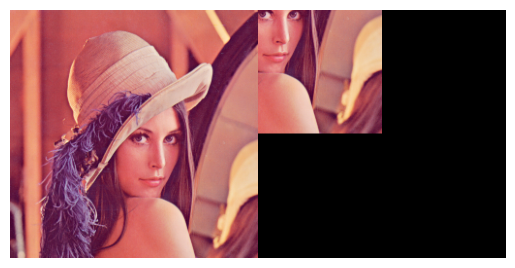

In [7]:
# รวมภาพเดิมและภาพแปลแล้ว แล้วแสดง
mul_img = cv2.hconcat([img, res])  # ต่อภาพแนวนอน
ShowImage(mul_img)

#### <span style='color:tomato;'>การปรับขนาดภาพ 2D</span>


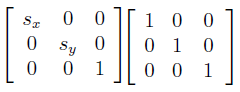   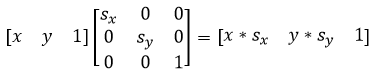    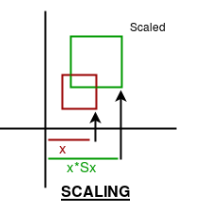

In [8]:
# ฟังก์ชันปรับขนาดภาพ (Scaling)
# sx, sy = ตัวคูณการปรับขนาด
def img_scaling(img, sx, sy):
    out = np.zeros_like(img, dtype='uint8')  # สร้างภาพเอาต์พุตขนาดเดียวกัน
    S = np.identity(3, dtype=float)  # เมทริกซ์การปรับขนาด
    S[0, 0] = sx  # ตัวคูณสำหรับแกน x
    S[1, 1] = sy  # ตัวคูณสำหรับแกน y
    rows, cols, n = img.shape
    
    # วนลูปผ่านพิกเซลแต่ละตัว
    for y in range(rows):
        for x in range(cols):
            xy = np.array([x, y, 1], dtype=float)
            new_xy = np.matmul(xy, S)  # คูณเมทริกซ์เพื่อปรับขนาด
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            # ตรวจสอบขอบเขต
            if 0 <= xn < cols and 0 <= yn < rows:
                out[yn, xn, :] = img[y, x, :]
    return out.astype(np.uint8)

### <span style='color:tomato;'>การใช้งานการปรับขนาดภาพ</span>


In [9]:
# ปรับขนาดภาพให้ใหญ่ขึ้น 1.5 เท่า
res = img_scaling(img, 1.5, 1.5)

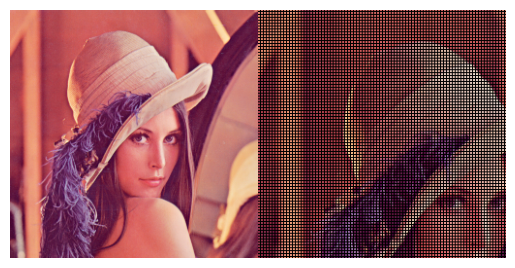

In [10]:
# แสดงผลเปรียบเทียบภาพเดิมกับภาพที่ปรับขนาดแล้ว
mul_img = cv2.hconcat([img, res])
ShowImage(mul_img)

### <span style='color:tomato;'>การประกอบเมทริกซ์การแปลง</span>
#### <span style='color:orange;'>สร้างเมทริกซ์การแปลง</span>


In [11]:
# สร้างเมทริกซ์การแปลงเริ่มต้น (เมทริกซ์เอกลักษณ์)
def init_Transformation():
    return np.identity(3, dtype=float)

In [12]:
# คูณเมทริกซ์แปลกับเมทริกซ์การแปลงเดิม
def matrix_Translate(T, tx, ty):
    Ts = np.identity(3, dtype=float)
    Ts[2, 0] = tx  # ค่าแปล x
    Ts[2, 1] = ty  # ค่าแปล y
    return np.matmul(Ts, T)  # คูณเมทริกซ์

In [13]:
# คูณเมทริกซ์ปรับขนาดกับเมทริกซ์การแปลงเดิม
def matrix_Scale(T, sx, sy):
    S = np.identity(3, dtype=float)
    S[0, 0] = sx  # ตัวคูณ x
    S[1, 1] = sy  # ตัวคูณ y
    return np.matmul(S, T)  # คูณเมทริกซ์

In [14]:
def centroid_image(img):
    r,c,n  = img.shape
    return (int(r/2),int(c/2)) 

In [ ]:
# ใช้เมทริกซ์การแปลงกับภาพ
def img_transform(img, T):
    out = np.zeros_like(img, dtype='uint8')
    rows, cols, n = img.shape
    
    # วนลูปผ่านพิกเซลแต่ละตัว
    for y in range(rows):
        for x in range(cols):
            xy = np.array([x, y, 1], dtype=float)
            new_xy = np.matmul(xy, T)  # ใช้เมทริกซ์มาแปลงพิกัด
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            # ตรวจสอบขอบเขต
            if 0 <= xn < cols and 0 <= yn < rows:
                out[yn, xn, :] = img[y, x, :] 
    return out.astype(np.uint8)

#### <span style='color:lightgreen;'>การใช้งานการแปลงเมทริกซ์</span>
**<span style='color:lightblue;'>ตัวอย่างง่าย</span>**


In [16]:
# ตัวอย่างง่าย: แปลภาพให้จุดศูนย์กลางไปยังมุมบนซ้าย
img = cv2.imread("./img/lena.png", cv2.IMREAD_COLOR)
cen = centroid_image(img)
T = init_Transformation()  # เริ่มต้นเมทริกซ์
T = matrix_Translate(T, -cen[0], -cen[1])  # เพิ่มการแปล
out_ts = img_transform(img, T)  # ใช้เมทริกซ์แปลงภาพ

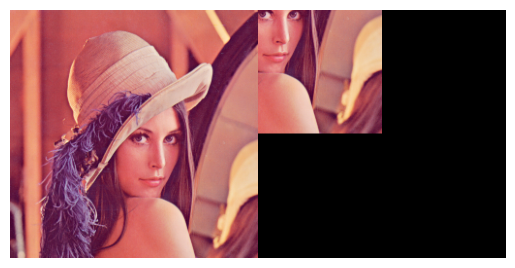

In [17]:
mul_img = cv2.hconcat([img, out_ts])
ShowImage(mul_img)

In [18]:
# ตัวอย่างการปรับขนาด - ลดขนาดเหลือ 80%
T = init_Transformation()
T = matrix_Scale(T, 0.8, 0.8)  # ปรับขนาด 80%
out_scale = img_transform(img, T)

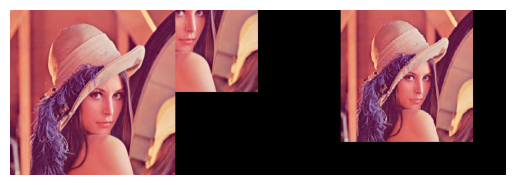

In [19]:
mul_img = cv2.hconcat([img, out_ts, out_scale])
ShowImage(mul_img)

**<span style='color:lightblue;'>ตัวอย่างขั้นสูง</span>**


In [20]:
# ตัวอย่างขั้นสูง: แปลไปศูนย์กลาง → ปรับขนาด → แปลกลับ
img = cv2.imread("./img/lena.png", cv2.IMREAD_COLOR)
cen = centroid_image(img)
T = init_Transformation()
T = matrix_Translate(T, cen[1], cen[0])  # แปลไปศูนย์กลาง
T = matrix_Scale(T, 0.6, 0.6)  # ปรับขนาด 60%
T = matrix_Translate(T, -cen[1], -cen[0])  # แปลกลับสู่ตำแหน่งเดิม
out = img_transform(img, T)

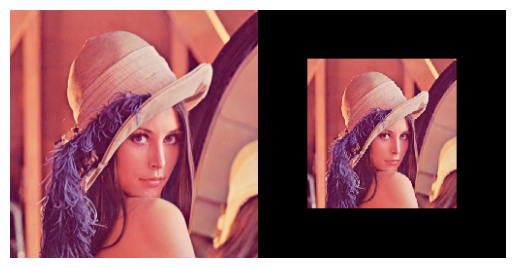

In [21]:
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)

#### <span style='color:tomato;'>การหมุนภาพ 2D</span>


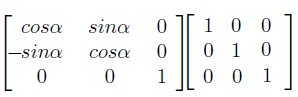     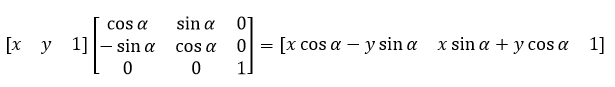     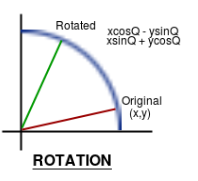

In [22]:
# ฟังก์ชันการแปลงการหมุนเมทริกซ์
# theta = มุมการหมุน (หน่วยองศา)
def matrix_Rotatef(T, theta):
    R = np.identity(3, dtype=float)
    ang = (theta * np.pi) / 180  # แปลงจากองศาเป็นเรเดียน
    R[0, 0] = math.cos(ang)  # cos(theta)
    R[0, 1] = -math.sin(ang)  # -sin(theta)
    R[1, 0] = math.sin(ang)  # sin(theta)
    R[1, 1] = math.cos(ang)  # cos(theta)
    return np.matmul(R, T)

#### <span style='color:tomato;'>การใช้งานการหมุนภาพ</span>
**<span style='color:tomato;'>ตัวอย่างง่าย</span>**


In [23]:
# หมุนภาพ 45 องศา
T = init_Transformation()
T = matrix_Rotatef(T, 45)  # หมุน 45 องศา
out = img_transform(img, T)

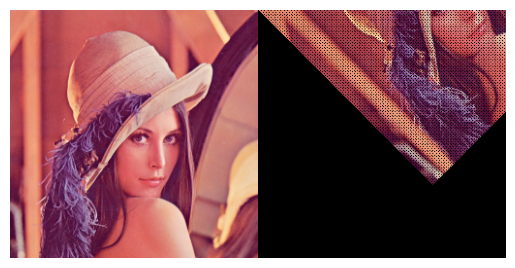

In [24]:
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)

**<span style='color:tomato;'>ตัวอย่างขั้นสูง 1</span>**


In [25]:
# ตัวอย่างขั้นสูง: แปลไปศูนย์กลาง → หมุน → แปลกลับ
T = init_Transformation()
T = matrix_Translate(T, cen[1], cen[0])  # แปลไปศูนย์กลาง
T = matrix_Rotatef(T, -45)  # หมุน -45 องศา
T = matrix_Translate(T, -cen[1], -cen[0])  # แปลกลับ
out = img_transform(img, T)

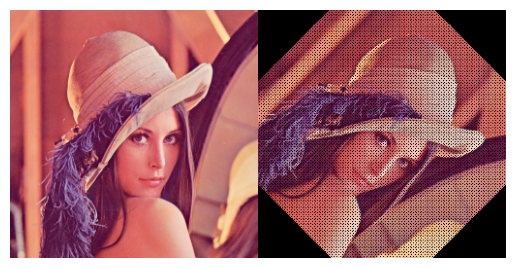

In [26]:
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)

**<span style='color:tomato;'>ตัวอย่างขั้นสูง 2</span>**


In [27]:
# ตัวอย่างขั้นสูง 2: แปล → หมุน → ปรับขนาด → แปลกลับ
T = init_Transformation()
T = matrix_Translate(T, cen[1], cen[0])  # แปลไปศูนย์กลาง
T = matrix_Rotatef(T, 45)  # หมุน 45 องศา
T = matrix_Scale(T, 0.5, 0.5)  # ปรับขนาด 50%
T = matrix_Translate(T, -cen[1], -cen[0])  # แปลกลับ
out = img_transform(img, T)

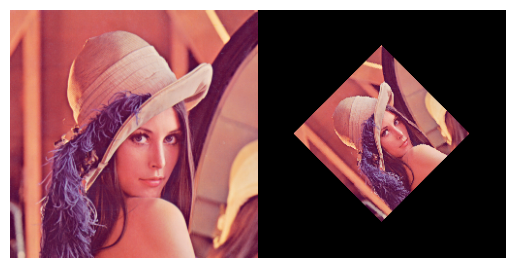

In [28]:
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)

In [29]:
# ลดเสียงรบกวนโดยใช้ค่ามัธยฐาน (Median Blur)
out_new = cv2.medianBlur(out, 3)  # ประยุกต์ใช้ median filter ขนาด 3x3

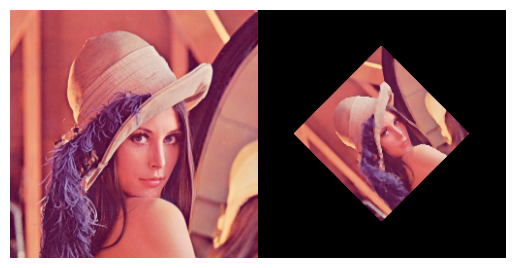

In [30]:
mul_img = cv2.hconcat([img, out_new])
ShowImage(mul_img)